In [77]:
# Parameters
shape_cat = "mcal"
vol = "vlim"
z_range = "all_z"
key = "mag"


In [78]:
if key=="lambda":
    key=('All','All','LAMBDA_CHISQ')
elif key=="z":
    key=('All','All','Z_LAMBDA')
elif key=="mag":
    key=('All','All','BCG_ZLUM')

In [79]:
#This header file contains all the common packages
%matplotlib inline
%run /global/project/projectdirs/des/zhou/sa/lib/src/header.py $shape_cat $vol $z_range 
%run -i /global/project/projectdirs/des/zhou/sa/lib/src/func.py  

In [80]:
def thirds_by_key(catalog,key):
    step0=catalog[key].quantile(0.0)
    step1=catalog[key].quantile(0.333333)
    step2=catalog[key].quantile(0.666666)
    step3=catalog[key].quantile(1)
    
    catalog1=catalog[(catalog[key]>step0) & (catalog[key]<step1)]
    catalog2=catalog[(catalog[key]>step1) & (catalog[key]<step2)]
    catalog3=catalog[(catalog[key]>step2) & (catalog[key]<step3)]
    
    return (catalog1,catalog2,catalog3)

In [81]:
clusters.columns

MultiIndex([('Band',   'g',       'MODEL_MAG'),
            ('Band',   'g',    'MODEL_MAGERR'),
            ('Band',   'g',  'MAG_LAMBDA_ERR'),
            ('Band',   'r',       'MODEL_MAG'),
            ('Band',   'r',    'MODEL_MAGERR'),
            ('Band',   'r',  'MAG_LAMBDA_ERR'),
            ('Band',   'i',       'MODEL_MAG'),
            ('Band',   'i',    'MODEL_MAGERR'),
            ('Band',   'i',  'MAG_LAMBDA_ERR'),
            ('Band',   'z',       'MODEL_MAG'),
            ...
            ( 'All', 'All',      'LIM_LIMMAG'),
            ( 'All', 'All', 'LIM_LIMMAG_HARD'),
            ( 'All', 'All',            'ZMAG'),
            ( 'All', 'All',        'ZMAG_ERR'),
            ( 'All', 'All',            'ZLUM'),
            ( 'All', 'All',        'BCG_ZLUM'),
            ( 'All', 'All',               'Q'),
            ( 'All', 'All',               'U'),
            ( 'All', 'All',            'Beta'),
            ( 'All', 'All',              'Ce')],
           names=['Type

In [82]:
if key!="":
    clusters_list=thirds_by_key(clusters,key)

In [83]:
cluster_list=[None]*3
for quantile in range(3):
    cluster_list[quantile]=np.load("/global/project/projectdirs/des/zhou/sa/data/2pt/{}_{}_{}_{}.npz".format(shape_cat,vol,key,quantile))

FileNotFoundError: [Errno 2] No such file or directory: "/global/project/projectdirs/des/zhou/sa/data/2pt/mcal_vlim_('All', 'All', 'BCG_ZLUM')_0.npz"

In [84]:
print(clusters_list[0][key].mean())
print(clusters_list[1][key].mean())
print(clusters_list[2][key].mean())

1.9765275716781616
3.1112263202667236
5.2027812004089355


In [85]:
# sum_abs,mean_abs,sig_abs,sum_rel,mean_rel,sig_rel,r_xi,r_meanlogr,r_sigma

In [86]:
def plt_w_error(cluster_file,label_):
    mean_rel=cluster_file['mean_abs']
    sig_rel=cluster_file['sig_abs']
    
    meanlogr=mean_rel[1]
    print(meanlogr)
    xi=mean_rel[0]
    varxi=sig_rel
    
    
    ax.errorbar(np.exp(meanlogr),-xi,yerr=varxi,label=label_)
    ax.set_xscale('log')

[-4.32910078 -3.85291627 -3.38475284 -2.89370792 -2.42034187 -1.9324083
 -1.46501339 -0.98682368 -0.5126655  -0.16126244]
[-4.33252548 -3.85936443 -3.39720725 -2.90315568 -2.42751594 -1.94591668
 -1.46289885 -0.98748044 -0.51773843 -0.16673471]
[-4.31788568 -3.8520945  -3.38351194 -2.90338329 -2.41891314 -1.93883797
 -1.46172031 -0.9871125  -0.52611291 -0.16782987]


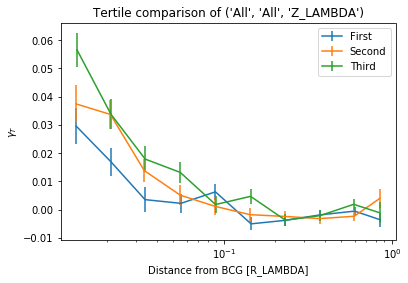

In [76]:
fig,ax=plt.subplots()

label_list=["First","Second","Third"]

for i,cluster_file in enumerate(cluster_list):
    plt_w_error(cluster_file,label_list[i])
    plt.legend()
    plt.title("Tertile comparison of {}".format(key))
    plt.xlabel("Distance from BCG [R_LAMBDA]")
    plt.ylabel(r"$\gamma_T$")
    plt.savefig('/global/project/projectdirs/des/zhou/z_tertile.pdf')

# Statistics

In [29]:
def print_data(sum_,mean_):
    sum_string=["Aggregated xi:", "Aggregated meanlogr:","Aggregated npairs:"]
    for i,data in enumerate(sum_):
        print(sum_string[i])
        print(sum_[i])
        print(sep)
    mean_string=["Mean xi:", "Mean meanlogr:","Mean npairs:"]
    for i,data in enumerate(mean_):
        print(mean_string[i])
        print(mean_[i])
        print(sep)